##### Homework 03


## Part 1 - Questions

### Question 1: 

Which brands produce the biggest amount of plastic bottle waste?

* Who (population):individual plastic bottles.
* What (subject, discipline): Envoiromental Science 
* Where (location): Across the globe
* When (snapshot, longitudinal): Yearly. 
* How much data do you need to do the analysis/work: Ideally data from every single country, speciallt coastal countries.

### Question 2: 

Which countries are the biggest producers of plastic waste?

* Who (population):individual plastic bottles.
* What (subject, discipline): Envoiromental Science 
* Where (location): Across the globe
* When (snapshot, longitudinal): Yearly. 
* How much data do you need to do the analysis/work: Ideally data from every single country, speciallt coastal countries.


### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?
Data can be collect that voluteer of an NGO or also government officials.

National Geographic.
https://www.nationalgeographic.com/environment/article/plastic-pollution

UN reports.
https://news.un.org/en/story/2021/10/1103692

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: Wastebase_scan-summary
2. Link to Data: https://www.kaggle.com/wastebase/plastic-bottle-waste
3. Source / Origin: 
	* Author or Creator: Wastebase.org
	* Publication Date: Updated on 02/09/2022
	* Publisher: Wastebase.org
	* Version or Data Accessed: Version 13
	* Data was collected in the shores of GB: United Kingdom, MZ: Mozambique, TZ: Tanzania and ZM: Zambia
4. License: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
5. Can You Use this Data Set for Your Intended Use Case? Yes, I fisrt choose the data set themI came up the questions, as the professor has suggested that it could be done. 

## Format




### Overview

* Format: A csv file
* Size: 1.01MB
* Number of Records: 2979



### Sample of Data




In [2]:
# TODO show a few lines of data from the actual file

# Use "regular" Python to do this in this code block
# Assume that jupyter-lab was started in your root directory
# with open('./data/raw/example-data.csv', 'r'): 
tuple_data = ()
for subdir, dirs, files in os.walk(r'/Users/aragaom/homework03-aragaomateus/data/raw'):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith(".csv"):
            with open(filepath,'r') as csv_data:
                csv_reader = csv.reader(csv_data)
                data = [file for file in csv_reader]
for i in range(len(data)):
    if i < 5:
        for word in data[i]:
            print(word,end='  ')
        print('\n')
    else:
        break

NameError: name 'os' is not defined


### Fields or Column Headers

* Field/Column 1: product_barcode datatype(int)
* Field/Column 2: product_label datatype(str)
* Field/Column 3: product_size datatype(str)
* Field/Column 4: brand_name datatype(str)
* Field/Column 5: manufacturer_country datatype(str)
* Field/Column 6: manufacturer_name datatype(str)

* Field/Column 7: scan_country datatype(str)
* Field/Column 8: data_url datatype(str)
* Field/Column 9: bottle_weight datatype(float)
* Field/Column 10: bottle_count datatype(str)

## Part 3 - Extract / Transform

Since my data set only contains 10 columns, I manually examined the columns and choose the ones that would better fit my analysis.
I decide to use the columns refering to the brand name, the manufacture country and the bottle count per brand. I did not use to convert datatypes and I didn't need to treat the data itself, I believe that the data was well document with some kind of device.
The columns I used didn't need any sort of normalizing, eventhought the dataset does contains column with Nan as values. 


In [3]:
# TODO write code here!
import csv 
import numpy as np
import matplotlib.pyplot as plt
import random
import os
# indexes 3 == brand_name, 4 == manufacture_country origin country of the manfacturer, not nescessarily here it was bottled., 9 == bottle_count
tuple_data = ()
for subdir, dirs, files in os.walk(r'/Users/aragaom/homework03-aragaomateus/data/raw'):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith(".csv"):
            with open(filepath,'r') as csv_data:
                csv_reader = csv.reader(csv_data)
                data = [file for file in csv_reader]
            brand_name = [data[i][3] for i in range(len(data)) if i != 0 ]
            manufacture_country = [data[i][4] for i in range(len(data)) if i != 0 ]
            bottle_count = [data[i][9] for i in range(len(data)) if i != 0 ]
            month_data = {brand_name[i]:[manufacture_country[i],int(bottle_count[i])] for i in range(len(brand_name))}
            tuple_data = list(tuple_data)
            tuple_data.append(month_data)
            tuple_data = tuple(tuple_data)

count = 0
for dic in tuple_data:
    for line in dic:
        count+=1
print(count)


2979


## - Extract / Transform
Now that I have the data organized in a tuple with the data from the 12 files, I want to merge all of it into one dictonary that will take all the values across one year. 
And then, I divide each element of the dictionary into 3 different list for easier manipulation.

In [4]:
# getting data from manthly bases and turnig overall yearlly. merging the repeated companies.

yearly_data = {}
for month in tuple_data:
    for key,value in month.items():
        if key in yearly_data:
            yearly_data[key] = [value[0],yearly_data[key][1]+value[1]]
        else:
            yearly_data[key] = value

# organizing rudimentary table for values. 
# using the same loop to divide the dictionary in to 3 different collumns aka their keys and values.
brand = []
country = []
amount = []
sorted_countries = dict(sorted(yearly_data.values(), key=lambda x:x[0]))
for key,val in sorted_countries.items():
    for k, v in yearly_data.items():
        if v[0] == key:
            print(format(k,'<30s'),format(v[0],'<5s'),format(v[1],'<5'))
            brand.append(k)
            country.append(v[0])
            amount.append(v[1])

Oasis                          AE    119  
Yasaki                         AE    216  
Sierra de los Padres           AR    11   
Red Bull                       AT    41   
Safari                         BE    71   
Castle Lite                    BE    10   
Redd's                         BE    9    
Valeur                         BE    149  
big8                           CA    4    
Perfect White                  CI    11   
Dream Cosmetics                CI    129  
Master Kong                    CN    11   
Longrich                       CN    1    
NIVEA                          DE    14   
Quench                         DK    63   
Mercadona                      ES    3    
Vitale                         FR    140  
Volvic                         FR    8    
Activia                        FR    2    
Danone                         FR    30   
Kuche Kuche                    FR    68   
Nutriday                       FR    24   
Sobo                           FR    56   
Lanjarón   

## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



In [5]:
# TODO: copy and paste your results here
mean = np.mean(amount)
mean
print(sum(amount))

62004


#### Dispersion

In [6]:
deviation = np.std(amount)
deviation

726.428430284434

#### Outliers


In [11]:
# TODO: copy and paste your results here
minimo = min(amount)
brand_min = [ brand[i] for i in range(len(amount)) if amount[i]== minimo]
print(f'{minimo} from {brand_min[0]}')

maximo = max(amount)
brand_max = [ brand[i] for i in range(len(amount)) if amount[i] == maximo]
print(f'{maximo} from {brand_max[0]}')

1 from Longrich
10786 from Água de Namaacha


#### Other


In [12]:
# TODO: copy and paste your results here
median = np.median(amount)
median

21.0

###  Analysis on Categorical Data

#### Frequency

In [13]:
# TODO: copy and paste your results here
country_counts = {}
for place in country:
    if place in country_counts:
        country_counts[place] += 1
    else:
        country_counts[place] = 1
country_counts

{'AE': 2,
 'AR': 1,
 'AT': 1,
 'BE': 4,
 'CA': 1,
 'CI': 2,
 'CN': 2,
 'DE': 1,
 'DK': 1,
 'ES': 1,
 'FR': 8,
 'GB': 30,
 'GH': 1,
 'IN': 2,
 'JP': 2,
 'KE': 37,
 'LT': 1,
 'MT': 1,
 'MW': 6,
 'MY': 1,
 'MZ': 25,
 'NA': 1,
 'NL': 5,
 'PT': 6,
 'SG': 2,
 'TH': 1,
 'TR': 3,
 'TZ': 31,
 'UA': 1,
 'UK': 118,
 'US': 37,
 'ZA': 23,
 'ZM': 30,
 'ZW': 1}

#### Unique Values

In [14]:
# TODO: copy and paste your results here
sorted_countries.keys()

dict_keys(['AE', 'AR', 'AT', 'BE', 'CA', 'CI', 'CN', 'DE', 'DK', 'ES', 'FR', 'GB', 'GH', 'IN', 'JP', 'KE', 'LT', 'MT', 'MW', 'MY', 'MZ', 'NA', 'NL', 'PT', 'SG', 'TH', 'TR', 'TZ', 'UA', 'UK', 'US', 'ZA', 'ZM', 'ZW'])

## Part 5 - Visualizations



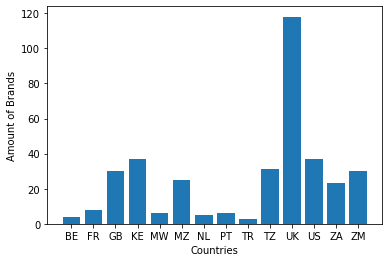

In [15]:
# TODO: add visualizations here

names = [ k for k,v in country_counts.items() if v > 2]
values = [ v for k,v in country_counts.items() if v > 2]

plt.xlabel('Countries')
plt.ylabel('Amount of Brands')
plt.bar(names, values, )
plt.show()

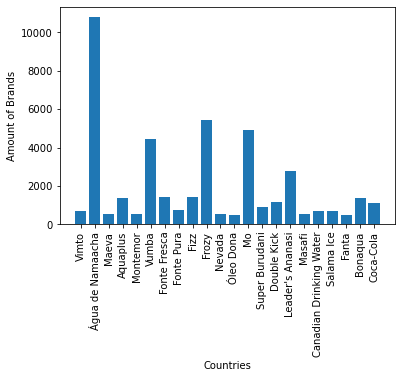

In [16]:
names = [ k for k,v in zip(brand,amount) if v >400]
values = [ v for k,v in zip(brand,amount) if v >400]

plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.ylabel('Amount of Brands')
plt.bar(names, values, )
plt.show()

#### First graph.
In the first graph I am plotting the amount of brands related to a certain country. For this graph I only grouped the brands manufactured in the same country, this is not related to where the bottles came from upon entereing the ocean.
#### Second graph.
In the second graph I am ploting the amount of individual bottles and their respective brands. Here, the different brands of the same manfacturer are considered. 
An observation in between graphs is that one would think that companies from the UK would be responsible for the highsest number of plastic bottles, when in fact the brand responsible the biggest amount of pollution was from Mozambique. 

## Part 6 - Conclusion
At the start, I wanted something related to the impact of clothing on the environment, but I had a hard finding dataset that would be related to retail waste. Then I turned myself to the topic of waste itself and then I found this dataset. 
My focus was on figuring out which companies pollute the most. And which countries were affected the most. I soon realized that these questions couldn't be fully answered with this data set. I believe that I did not have full knowledge about the topic, but while I was exploring the data and reasoning about the data, I realized some things that I should be looking for on my next analysis of similar data.

My conclusion from his data set is that the largest amount of plastic bottles collected came from the neighboring countries, especially Mozambique. But still, it was very interesting to see that bottles from far way countries such as Argentina and japan ended up in Africa and on the shores of the United Kingdom. 

It was not surprising to see that the US is the country outside of Africa from which most branded bottles came, given that us has such a large consumer market. 

## Part 7 - Heights and Weights

In [17]:
import csv 
import numpy as np
import matplotlib.pyplot as plt
import random
with open("adult19.csv",'r') as csv_data:
    csv_reader = csv.reader(csv_data)
    data = [file for file in csv_reader]

print(len(data))
# saving the indexes given that i know the name of the columns becasue i read the documentation. 
# reated a list so i can quickly parse the hearders to get the location of the height and weight
indexes = [ i for i in range(len(data[0])) if data[0][i] in ['HEIGHTTC_A','WEIGHTLBTC_A']]

31998


In [18]:
# extracting the data and turning into integer and also in a numpy array
weight = np.array([int(data[i][indexes[0]]) for i in range(len(data)) if i != 0 ])
len(weight)

31997

In [19]:
# extracting the data and turning into integer and also in a numpy array
# also adding the jitter as suggested by the professor. 
height = np.array([int(data[i][indexes[1]])for i in range(len(data)) if i != 0])
jitter = 1.3
heights = [h+random.uniform(-jitter,jitter) for h in height]


In [20]:
# correlaetion between weight and height
correlation = np.corrcoef(weight,height)
correlation

array([[1.        , 0.76046219],
       [0.76046219, 1.        ]])

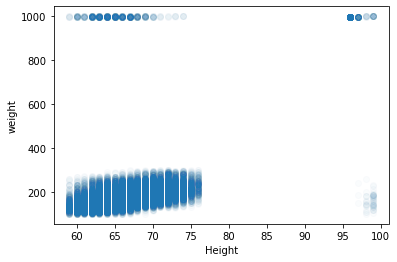

In [21]:
# scatter plot.
plt.xlabel('Height')
plt.ylabel('weight')
plt.scatter(height,weight,alpha = 0.02)